<a href="https://colab.research.google.com/github/ydydydydydy/Colab/blob/main/ex00_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 단축키 사용법
  - 실행단축키
    - ctrl + Enter : 실행 후에 커서가 그대로 위치
    - shift + Enter : 실행 후 커서 아래 셀로 이동
    - alt + Enter : 실행 후 아래 셀 생성하고 아래로 이동

  - 마크다운 변환(코드셀 -> 텍스트셀)
    - ctrl + m + m

  - 코드모드로 변환(텍스트 -> 코드)
    - ctrl + m + y
  
  - 셀 아래에 추가하기
    - ctrl + m + b
  
  - 셀 위에 추가하기
    - ctrl + m + a
  

### 딥러닝 맛보기
- 딥러닝이란?
  - 인간의 신경망을 모방하여 학습하고 예측하는 기술
  - 대량의 데이터에서 복잡한 패턴이나 규칙을 찾아내는 능력이 뛰어남
  - 머신러닝에 비해 조금 더 유연한 사고를 한다
  - 인간의 뉴런 == 딥러닝에서 선형모델
  - 주로 영상, 음성 이미지 처리에 사용된다

- tensorflow
  - 구글이 만든 딥러닝을 위한 라이브러리

- keras
  - tensorflow 위에서 동작하는 라이브러리로 사용자 친화적 라이브러리
  

In [34]:
# tensorflow 버전 확인
import tensorflow as tf
print(tf.__version__)
# 2.13.0
# 설치버전 확인 이유: 프로젝트 진행시 오픈소스 가져다 쓸 때 충돌방지

2.13.0


In [35]:
# 리눅스기반의 코랩 (리눅스명령어 그대로 사용가능)
# 리눅스 명령어를 사용하여 현재 작업 디렉토리 확인
!pwd # print work directory

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [36]:
# 현재 작업 디렉토리의 파일 목록 조회
!ls

 data  'ex00_딥러닝 맛보기.ipynb'


In [37]:
# 작업 디렉토리 변경
# %cd (change directory)
%cd "/content/drive/MyDrive/Colab Notebooks/DeepLearning"

/content/drive/MyDrive/Colab Notebooks/DeepLearning


In [38]:
# 다시 현재 폴더 경로 확인
!pwd

/content/drive/MyDrive/Colab Notebooks/DeepLearning


### 목표
- 공부시간에 따른 수학 성적을 예측하는 회귀모델을 만들어보자
- keras 활용해서 신경망 구성하는 방법을 연습해보자

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# 데이터 불러오기
data = pd.read_csv('./data/student-mat.csv', delimiter=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [41]:
# 데이터 정보확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 문제와 답으로 분리
- 입력특성: 1개(studytime)
- 정답: G3


In [42]:
# 문제데이터 (X)
X = data['studytime']
# 정답데이터 (y)
y = data['G3']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# train,test 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=915,
                                                    test_size = 0.2)

In [45]:
# 크기확인
X_train.shape, y_train.shape

((316,), (316,))

In [46]:
X_test.shape, y_test.shape

((79,), (79,))

### 머신러닝 모델과 딥러닝 모델의 차이점
- 머신러닝
  - 완제품 장난감: 팔정도만 움직일 수 있음(하이퍼파라미터만 조절이 가능한 것)
  - 모델생성(완성된 객체 사용) -> 모델학습 -> 모델예측 -> 모델평가

- 딥러닝
  - 레고블럭: 다양한 구성이 가능
  - 모델생성(모델을 직접 구성) -> 모델학습 -> 모델예측 -> 모델평가

### 머신러닝 모델링(선형회귀모델)

In [47]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.metrics import mean_squared_error  # 회귀모델의 평가지표 도구

In [48]:
from sklearn import linear_model
# 1. 모델 생성
linear_model = LinearRegression()

# 2. 모델 학습 (학습용 문제, 학습용 정답)
linear_model.fit(X_train.values.reshape(-1,1), y_train)

# 3. 모델 예측 (테스트용 문제)
linear_pre = linear_model.predict(X_test.values.reshape(-1,1))

# 4. 모델 평가 (실제값, 예측값)
mean_squared_error(y_test, linear_pre)

24.058078771701606

In [49]:
X_train.values.reshape(-1,1)

array([[1],
       [1],
       [1],
       [2],
       [1],
       [4],
       [1],
       [2],
       [2],
       [1],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [2],
       [1],
       [2],
       [3],
       [4],
       [3],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [4],
       [3],
       [3],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [3],
       [1],
       [2],
       [1],
       [3],
       [1],
       [4],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
    

In [50]:
# 머신러닝 모델은 입력특성을 2차원으로 받는다
# 1차원 -> 2차원 변경
X_train.values.reshape(-1,1)

array([[1],
       [1],
       [1],
       [2],
       [1],
       [4],
       [1],
       [2],
       [2],
       [1],
       [1],
       [3],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [2],
       [1],
       [2],
       [3],
       [4],
       [3],
       [2],
       [1],
       [1],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
       [1],
       [1],
       [4],
       [3],
       [3],
       [2],
       [1],
       [1],
       [2],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [1],
       [3],
       [1],
       [2],
       [1],
       [3],
       [1],
       [4],
       [3],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
    

### 딥러닝 모델링(모델 구조 설계)

In [51]:
# 딥러닝 모델 도구 불러오기
# 텐서플로우 안에 있는 keras
from tensorflow.keras.models import Sequential # 모델의 뼈대
# 신경망의 구성요소 (하나씩 조립)
from tensorflow.keras.layers import InputLayer, Dense, Activation
# InputLayer : 입력
# Dense : 밀집도
# Activation : 활성화함수 (인간을 모방하기 위해서 사용하는 함수)

#### 딥러닝모델 설계 순서
1. 신경망 구조 설계
2. 신경망 학습 및 평가 방법 설정
3. 학습
4. 예측 및 평가

In [52]:
# 1. 신경망 구조 설계
# 뼈대 생성
model = Sequential()
# 입력층
model.add(InputLayer(input_shape = (1,))) # 입력특성의 개수를 작성(studytime 1개)
# 중간층 (은닉층)
model.add(Dense(units = 10)) # 뉴런 10개를 연결 -> 학습의 능력을 결정
model.add(Activation('sigmoid')) # 활성화함수 : 인간을 모방을 위함 (위 선형함수와 짝꿍)
# 출력층
model.add(Dense(units = 1)) # 예측할 데이터의 형태 (성적데이터 1개)


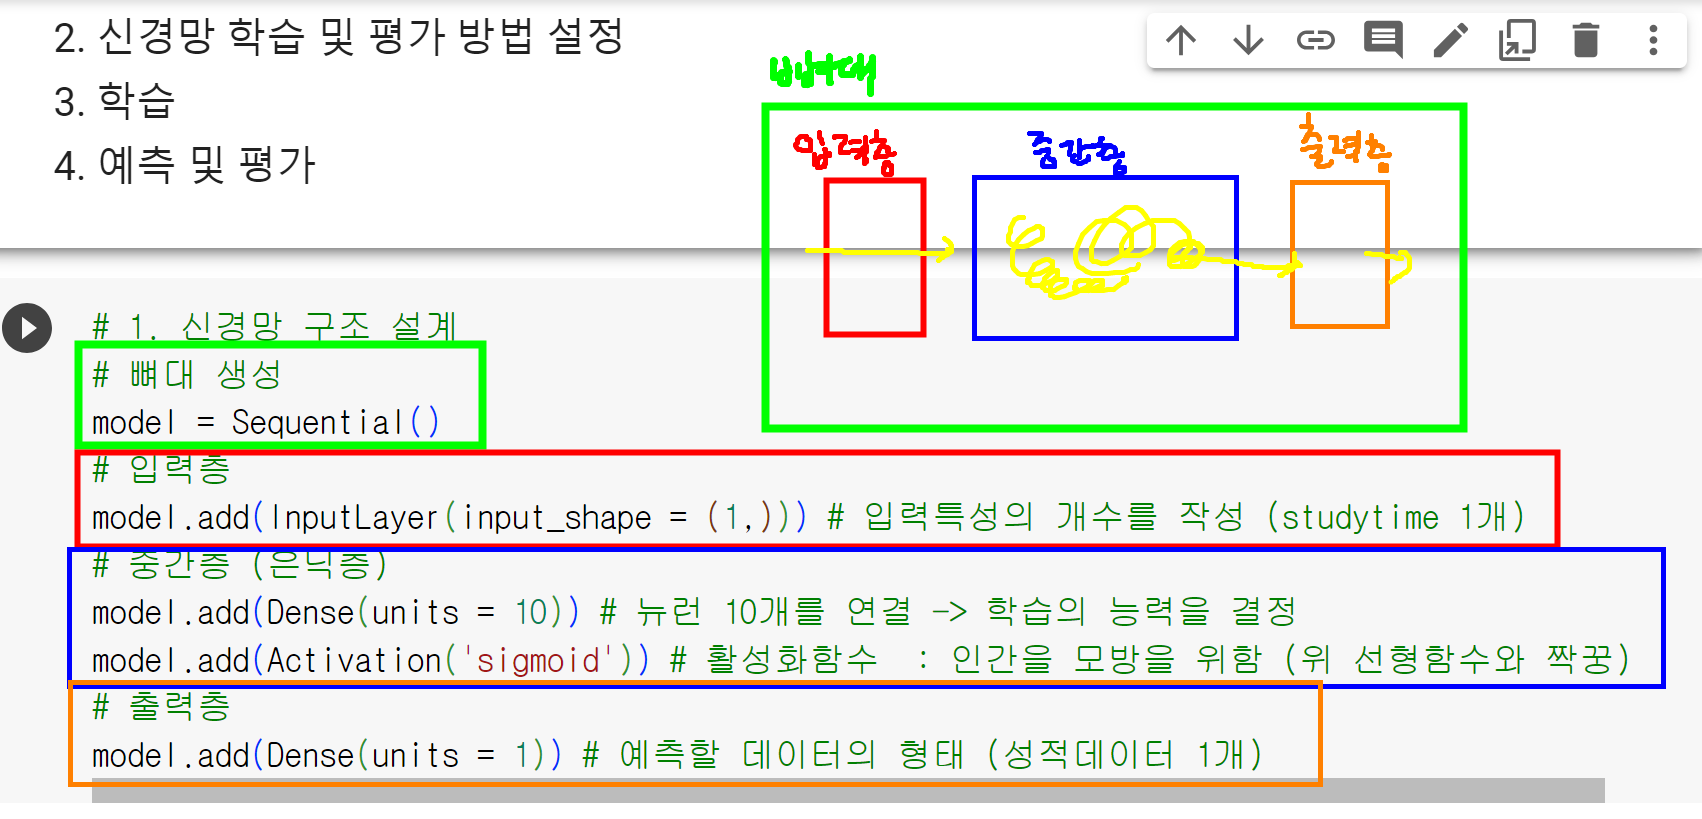


In [53]:
# 2. 학습 및 평가 방법 설정
# 딥러닝 모델은 학습법과 평가법을 지정해주어야한다
model.compile(loss = 'mean_squared_error', # 모델의 잘못된 정도(오차) 측정 알고리즘
              optimizer = 'SGD', # 모델의 w,b 값을 최적화하는 알고리즘
              metrics = ['mse'])

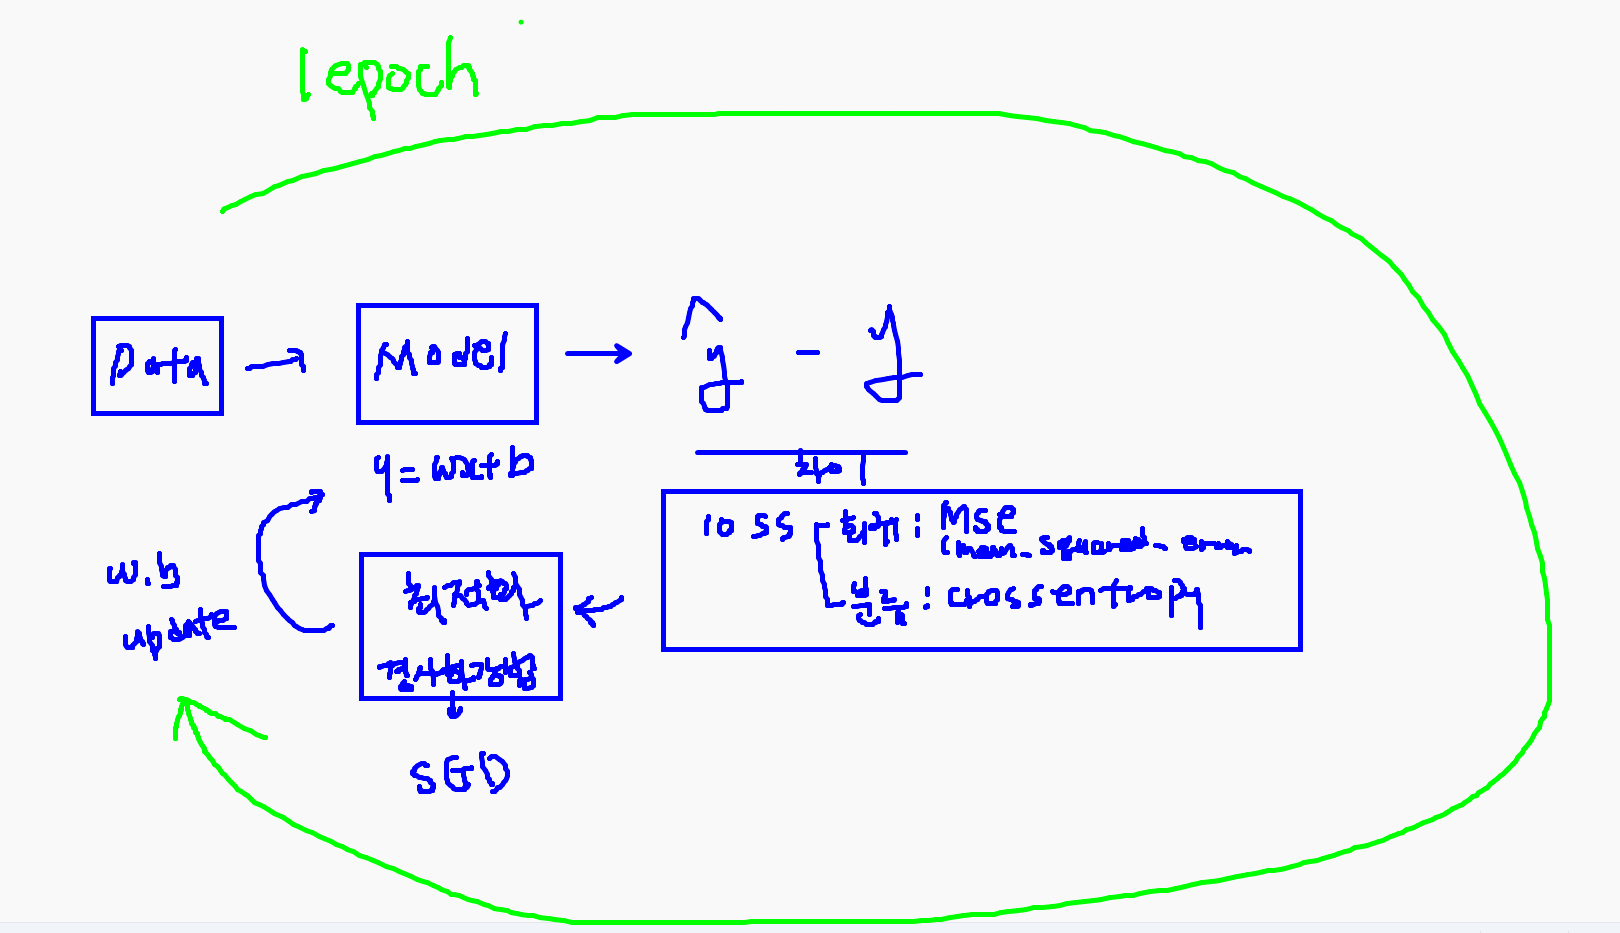

In [54]:
# 3. 모델학습 (교차검증 => 일반화를 위해)
h1 = model.fit(X_train, y_train, validation_split=0.2, # 교차검증을 위한 데이터 남겨두기
               epochs = 20) # 모델의 최적화 (업데이트 횟수, 반복횟수)
# h1 변수에 담는 이유: 로그를 출력하여 패턴을 확인하기 위함

Epoch 1/20
8/8 [==============================] - 1s 30ms/step - loss: 86.7960 - mse: 86.7960 - val_loss: 40.7149 - val_mse: 40.7149
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 27.8282 - mse: 27.8282 - val_loss: 23.8835 - val_mse: 23.8835
Epoch 3/20
8/8 [==============================] - 0s 7ms/step - loss: 20.2921 - mse: 20.2921 - val_loss: 22.6212 - val_mse: 22.6212
Epoch 4/20
8/8 [==============================] - 0s 9ms/step - loss: 19.5663 - mse: 19.5663 - val_loss: 22.5545 - val_mse: 22.5545
Epoch 5/20
8/8 [==============================] - 0s 9ms/step - loss: 19.4864 - mse: 19.4864 - val_loss: 22.5817 - val_mse: 22.5817
Epoch 6/20
8/8 [==============================] - 0s 7ms/step - loss: 19.5047 - mse: 19.5047 - val_loss: 22.5692 - val_mse: 22.5692
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 19.4882 - mse: 19.4882 - val_loss: 22.5647 - val_mse: 22.5647
Epoch 8/20
8/8 [==============================] - 0s 11ms/step - loss: 19.5

In [55]:
# 4. 모델 평가
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 6ms/step - loss: 24.2642 - mse: 24.2642


[24.264196395874023, 24.264196395874023]

In [56]:
# 모델학습 로그출력
h1.history

{'loss': [86.79603576660156,
  27.828218460083008,
  20.292062759399414,
  19.566333770751953,
  19.486392974853516,
  19.504653930664062,
  19.488168716430664,
  19.517362594604492,
  19.492931365966797,
  19.526906967163086,
  19.516216278076172,
  19.440793991088867,
  19.499853134155273,
  19.408931732177734,
  19.508041381835938,
  19.476213455200195,
  19.42870330810547,
  19.466712951660156,
  19.461349487304688,
  19.43687629699707],
 'mse': [86.79603576660156,
  27.828218460083008,
  20.292062759399414,
  19.566333770751953,
  19.486392974853516,
  19.504653930664062,
  19.488168716430664,
  19.517362594604492,
  19.492931365966797,
  19.526906967163086,
  19.516216278076172,
  19.440793991088867,
  19.499853134155273,
  19.408931732177734,
  19.508041381835938,
  19.476213455200195,
  19.42870330810547,
  19.466712951660156,
  19.461349487304688,
  19.43687629699707],
 'val_loss': [40.714927673339844,
  23.883506774902344,
  22.621198654174805,
  22.554508209228516,
  22.5816

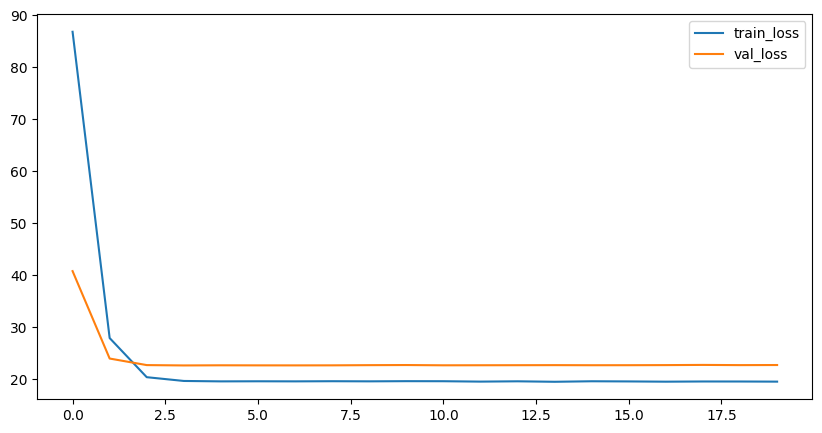

In [57]:
# 모델학습 시각화
plt.figure(figsize = (10,5))
plt.plot(h1.history['loss'], label = 'train_loss')
plt.plot(h1.history['val_loss'], label = 'val_loss')
plt.legend()# 범례
plt.show()

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### 4개의 입력특성을 골라 학습시켜보자

In [61]:
X = data[['studytime','freetime','traveltime','health']]
y = data['G3']

In [62]:
# train,test 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 918)

In [63]:
# 데이터크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((316, 4), (316,), (79, 4), (79,))

In [64]:
# 1. 신경망 구조설계
# 뼈대
model2 = Sequential()
# 입력층 input_shape = 나의 특성수
model2.add(InputLayer(input_shape = (4,))) # 입력특성 4개
# 중간층
model2.add(Dense(units = 10))
model2.add(Activation ('sigmoid'))
# 출력층
model2.add(Dense (units = 1))

In [65]:
# 2. 학습방법과 평가방법 설정
model2.compile( loss = 'mean_squared_error',
               optimizer = 'SGD',
                metrics = ['mse'])

In [66]:
# 3. 학습
h2 = model2.fit(X_train,y_train,validation_split=0.2, epochs = 20)

Epoch 1/20
8/8 [==============================] - 1s 110ms/step - loss: 95.6937 - mse: 95.6937 - val_loss: 69.1270 - val_mse: 69.1270
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 41.4455 - mse: 41.4455 - val_loss: 37.3670 - val_mse: 37.3670
Epoch 3/20
8/8 [==============================] - 0s 8ms/step - loss: 25.0525 - mse: 25.0525 - val_loss: 28.1831 - val_mse: 28.1831
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 21.3092 - mse: 21.3092 - val_loss: 25.9815 - val_mse: 25.9815
Epoch 5/20
8/8 [==============================] - 0s 8ms/step - loss: 20.6991 - mse: 20.6991 - val_loss: 25.5708 - val_mse: 25.5708
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 20.6692 - mse: 20.6692 - val_loss: 25.4197 - val_mse: 25.4197
Epoch 7/20
8/8 [==============================] - 0s 9ms/step - loss: 20.6373 - mse: 20.6373 - val_loss: 25.3010 - val_mse: 25.3010
Epoch 8/20
8/8 [==============================] - 0s 8ms/step - loss: 20.5

In [67]:
# 3. 학습
h2 = model2.fit(X_train,y_train,validation_split=0.2, epochs = 20)

Epoch 1/20
8/8 [==============================] - 0s 13ms/step - loss: 20.5488 - mse: 20.5488 - val_loss: 25.1645 - val_mse: 25.1645
Epoch 2/20
8/8 [==============================] - 0s 9ms/step - loss: 20.5096 - mse: 20.5096 - val_loss: 25.3042 - val_mse: 25.3042
Epoch 3/20
8/8 [==============================] - 0s 10ms/step - loss: 20.5309 - mse: 20.5309 - val_loss: 25.2229 - val_mse: 25.2229
Epoch 4/20
8/8 [==============================] - 0s 10ms/step - loss: 20.5312 - mse: 20.5312 - val_loss: 25.2552 - val_mse: 25.2552
Epoch 5/20
8/8 [==============================] - 0s 10ms/step - loss: 20.5092 - mse: 20.5092 - val_loss: 25.1880 - val_mse: 25.1880
Epoch 6/20
8/8 [==============================] - 0s 9ms/step - loss: 20.5411 - mse: 20.5411 - val_loss: 25.2306 - val_mse: 25.2306
Epoch 7/20
8/8 [==============================] - 0s 10ms/step - loss: 20.4903 - mse: 20.4903 - val_loss: 25.1640 - val_mse: 25.1640
Epoch 8/20
8/8 [==============================] - 0s 11ms/step - loss: 

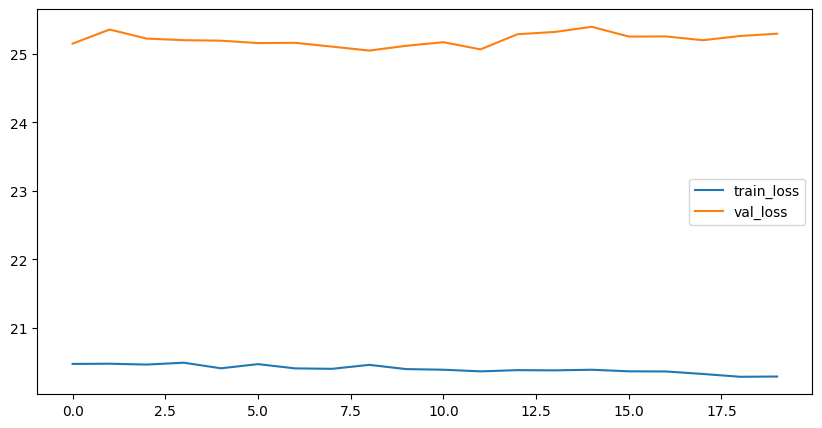

In [69]:
# 5. 시각화
plt.figure(figsize = (10,5))
plt.plot(h2.history['loss'], label = 'train_loss')
plt.plot(h2.history['val_loss'], label = 'val_loss')
plt.legend()# 범례
plt.show()